# TP2 - Big Data

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
from IPython.display import display
import time
import pandas as pd
import warnings
import math as math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist, squareform
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("Wave.txt", sep="\s", header=None)
display(dataframe)
X = dataframe.iloc[:, :40]
print(X)
y = dataframe.iloc[:, 40:41]
print(y)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.44,0.56,1.84,1.94,3.43,4.88,4.04,2.11,1.83,0.78,...,-2.56,-0.68,0.97,-0.78,-1.14,0.45,0.18,1.44,1.11,0
4996,1.18,-0.48,1.81,1.51,1.41,3.61,3.75,3.80,3.44,3.71,...,0.37,-1.96,-1.19,-1.08,1.37,-1.02,0.71,-0.10,0.36,1
4997,0.64,0.81,-0.38,-0.88,1.55,0.10,0.42,-0.93,-0.70,1.54,...,1.61,-0.81,-1.35,-0.84,-0.64,1.19,-0.38,-0.70,-0.85,2
4998,0.18,1.65,1.91,2.07,4.28,3.61,4.46,4.62,4.80,0.25,...,-0.65,-0.73,0.89,-0.97,-1.30,-0.20,-0.63,-0.92,0.63,0


        0     1     2     3     4     5     6     7     8     9   ...    30  \
0    -0.23 -1.21  1.20  1.23 -0.10  0.12  2.49  1.19  1.34  0.58  ... -0.63   
1     0.38  0.38 -0.31 -0.09  1.52  1.35  1.49  3.81  2.33  1.34  ...  0.31   
2    -0.69  1.00  1.08  1.48  2.44  3.39  3.09  4.08  5.48  3.61  ...  0.93   
3     0.40  0.68  0.27  1.39  1.03 -0.32 -1.23 -0.50  0.11  0.87  ...  1.18   
4    -0.81  1.59 -0.69  1.16  4.22  4.98  4.52  2.54  5.60  4.66  ... -0.07   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995  0.44  0.56  1.84  1.94  3.43  4.88  4.04  2.11  1.83  0.78  ...  0.52   
4996  1.18 -0.48  1.81  1.51  1.41  3.61  3.75  3.80  3.44  3.71  ... -0.41   
4997  0.64  0.81 -0.38 -0.88  1.55  0.10  0.42 -0.93 -0.70  1.54  ...  0.49   
4998  0.18  1.65  1.91  2.07  4.28  3.61  4.46  4.62  4.80  0.25  ...  0.17   
4999  2.05 -1.99  1.66  2.18  2.22  2.53  3.09  2.20  1.42  0.62  ...  0.21   

        31    32    33    34    35    36    37    3

# I. Découpage de la base

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# II. Simulation de l'aspect semi-supervisé

In [4]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# III. Sélection de variables semi-supervisée

In [21]:
class SemiSupervisedDatabase():

  def __init__(self, X, y, labelised_rate=0.5, training_ratio=0.5):
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=training_ratio, random_state=42)
    self.update_labelised_rate(labelised_rate)
    
    self.classes = np.unique(y)

    # 2D array to store infos about classes
    # Used to store the number of iterations for each class
    self.classes_infos = []
    # Computation of the iterations for each class
    for c in self.classes:
      nb = 0
      for i in range(len(self.X_train)):
        if self.y_train.values[i][0] == c:
          nb += 1
      self.classes_infos.append([nb])
    
  def update_labelised_rate(self, new_labelised_rate):

    self.X_train1, self.X_train2, self.y_train1, self.y_train2 = train_test_split(X_train, y_train, test_size=1-new_labelised_rate, random_state=42)

    # Optimized matrix computation and storage of each element's distance 
    self.X_train2_array = self.X_train2.values
    distances = pdist(self.X_train2_array)
    self.distance_matrix = squareform(distances)
    # Optimized Sij computation for Laplacian score
    self.Sij_all = self.Sij_all_compute()

  def Sij_all_compute(self, t=10):
    return np.exp(-(self.distance_matrix ** 2) / t)

  def S1(self, v):
    """
    S1(v) Fisher's score computed on the part of labalised data
    (Non-Optimized)
    """
    numerator = 0
    denominator = 0
    for c in range(len(self.classes)):
      numerator += self.classes_infos[c][0] * pow(self.mean_var(v, c) - self.mean_var(v), 2)
      denominator += self.classes_infos[c][0] * self.ecart_var(v, c)

    return numerator / denominator

  def S2(self, v):
    """
    S2(v) Laplacian score computed on the part of non-labalised data
    """
    numerator = 0
    numerator += np.sum(np.subtract.outer(self.X_train2.values[:, v], self.X_train2.values[:, v]) ** 2 * self.Sij_all)

    return numerator / np.var(self.get_var_by_class(v))

  def score(self, v):
    return self.S1(v) / self.S2(v)

  def score_all(self, debug=False):
    print("Score All")
    scores = []
    for v in range(np.shape(self.X)[1]):
      score = self.score(v)
      scores.append(score)
      if debug:
        print(f"Variable {v}, score : {score}")
    return scores

  def get_var_by_class(self, v, c=None):
    """
    Get all the values of variable 'v' for the class 'c'
    """
    var = []
    for i in range(len(self.X_train1)):
      if c is not None:
        if self.y_train1.values[i][0] == c:
          var.append(self.X_train1.values[i][v])
      else:
        var.append(self.X_train1.values[i][v])
    return var

  def mean_var(self, v, c=None):
    """
    Mean of the variable 'v' about the class 'c'
    """
    mean = 0
    nb = 0
    
    for i in range(len(self.X_train1)):
      if c is not None:
        if c == self.y_train1.values[i][0]:
          mean += self.X_train1.values[i][v]
          nb += 1
      else:
        mean += self.X_train1.values[i][v]
        nb += 1

    mean = mean / nb

    return mean

  def ecart_var(self, v, c):
    """
    Standard-deviation of the variable 'v' about the class 'c'
    """
    return np.var(self.get_var_by_class(v, c))
    

## Scores evaluations

[0 1 2]
[[859], [831], [810]]
40
615.97458822979
S2 => 0.02 seconds


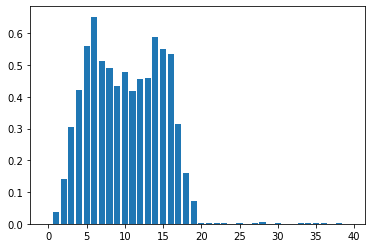

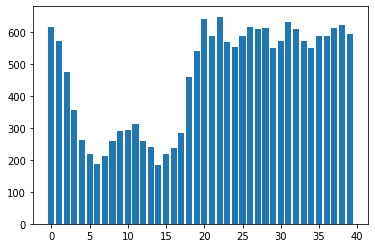

In [22]:
semi_FS = SemiSupervisedDatabase(X, y)

start_time = time.time()
print(semi_FS.S2(0))
print("S2 => {0:.2f} seconds".format(time.time() - start_time))

# Evaluation of the Fisher's score
all_S1 = []
for i in range(40):
  all_S1.append(semi_FS.S1(i))

plt.bar(range(0, 40), all_S1)
plt.show()

# Evaluation of the Laplacian's score
all_S2 = []
for i in range(40):
  all_S2.append(semi_FS.S2(i))

plt.bar(range(0, 40), all_S2)
plt.show()

In [23]:
all_scores = semi_FS.score_all(debug=True)

Score All
Variable 0, score : 8.888327613395249e-07
Variable 1, score : 6.7547845199916e-05
Variable 2, score : 0.0002951418805984407
Variable 3, score : 0.0008513275377058372
Variable 4, score : 0.0016064209873362652
Variable 5, score : 0.0025620939369769566
Variable 6, score : 0.003509172229884512
Variable 7, score : 0.0024317738348345183
Variable 8, score : 0.0018843618657141457
Variable 9, score : 0.0014942247493921145
Variable 10, score : 0.0016196308176109138
Variable 11, score : 0.0013388375064758058
Variable 12, score : 0.0017494044178436984
Variable 13, score : 0.001911655752076401
Variable 14, score : 0.0032104619550717894
Variable 15, score : 0.0025211855868480255
Variable 16, score : 0.0022633248392475076
Variable 17, score : 0.0011022097390104117
Variable 18, score : 0.00034530965570384785
Variable 19, score : 0.00013113522294882555
Variable 20, score : 1.900046199427472e-06
Variable 21, score : 4.340704441886989e-06
Variable 22, score : 2.4682479343015145e-06
Variable 23,

# IV. Evaluation de la sélection

## Tracer l’histogramme des pertinences de toutes les variables selon leurs scores

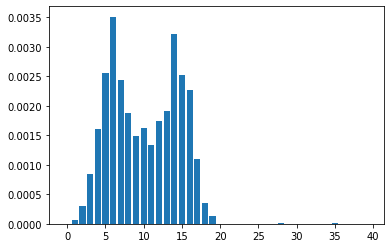

In [8]:
all_scores_sorted = all_scores.copy()
all_scores_sorted.sort(reverse=True)

plt.bar(range(len(all_scores)), all_scores)
plt.show()

sorted_indices = np.array(all_scores).argsort()[::-1]

## Tracer une courbe d’efficacité (selon les performances d’un perceptron multi couches (MLP) appris sur A) sur la base T, en fonction du nombre de variables pertinentes sélectionnées (par tranche de 5 variables)

Best 5 variables :
[ 6 14  5 15  7]
Score : 0.7304
Best 10 variables :
[ 6 14  5 15  7 16 13  8 12 10]
Score : 0.8404
Best 15 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3]
Score : 0.8608
Best 20 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3 18  2 19  1 28]
Score : 0.86
Best 25 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3 18  2 19  1 28 35 23 21 27
 30]
Score : 0.8432
Best 30 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3 18  2 19  1 28 35 23 21 27
 30 36 34 22 33 25]
Score : 0.838
Best 35 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3 18  2 19  1 28 35 23 21 27
 30 36 34 22 33 25 20 38 26 24 31]
Score : 0.8436
Best 40 variables :
[ 6 14  5 15  7 16 13  8 12 10  4  9 11 17  3 18  2 19  1 28 35 23 21 27
 30 36 34 22 33 25 20 38 26 24 31  0 37 32 39 29]
Score : 0.8312
[0.7304, 0.8404, 0.8608, 0.86, 0.8432, 0.838, 0.8436, 0.8312]


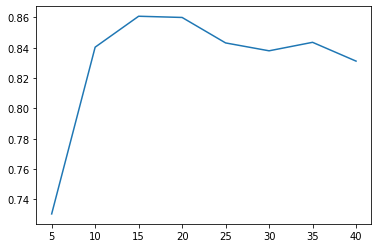

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

def MLP_efficiency_curve(indices, X, step=5):
  current_step = step
  scores = []
  for i in range(int(len(all_scores_sorted) / 5)):
    print(f"Best {current_step} variables :")
    best_vars = indices[:current_step]

    print(best_vars)
    # Variable choice
    X_best_train = X.iloc[:, best_vars]
    # Model Training
    model = MLPClassifier(alpha=0.01)
    model.fit(X_best_train, y_train)
    predict = model.predict(X_test.iloc[:, best_vars])

    # Accuracy score
    current_score = accuracy_score(y_test, predict)
    scores.append(current_score)

    print(f"Score : {current_score}")

    current_step += step

  print(scores)
  plt.plot(range(step, len(all_scores_sorted)+1, step), scores)

MLP_efficiency_curve(sorted_indices, X_train)

## Tracer cette même courbe avec les données non-normalisées

Best 5 variables :
range(0, 5)
Score : 0.568
Best 10 variables :
range(0, 10)
Score : 0.7868
Best 15 variables :
range(0, 15)
Score : 0.8444
Best 20 variables :
range(0, 20)
Score : 0.8544
Best 25 variables :
range(0, 25)
Score : 0.8484
Best 30 variables :
range(0, 30)
Score : 0.8376
Best 35 variables :
range(0, 35)
Score : 0.8324
Best 40 variables :
range(0, 40)
Score : 0.8388
[0.568, 0.7868, 0.8444, 0.8544, 0.8484, 0.8376, 0.8324, 0.8388]


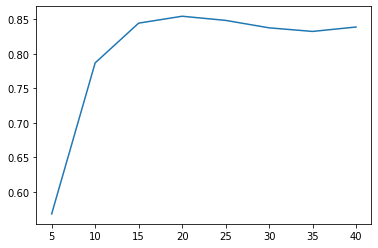

In [10]:
MLP_efficiency_curve(range(0, 40), X_train)

## Tracer la courbe sur les variables non-pertinentes

Best 5 variables :
[29 39 32 37  0]
Score : 0.3512
Best 10 variables :
[29 39 32 37  0 31 24 26 38 20]
Score : 0.3288
Best 15 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36]
Score : 0.338
Best 20 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36 30 27 21 23 35]
Score : 0.308
Best 25 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36 30 27 21 23 35 28  1 19  2
 18]
Score : 0.466
Best 30 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36 30 27 21 23 35 28  1 19  2
 18  3 17 11  9  4]
Score : 0.6652
Best 35 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36 30 27 21 23 35 28  1 19  2
 18  3 17 11  9  4 10 12  8 13 16]
Score : 0.7816
Best 40 variables :
[29 39 32 37  0 31 24 26 38 20 25 33 22 34 36 30 27 21 23 35 28  1 19  2
 18  3 17 11  9  4 10 12  8 13 16  7 15  5 14  6]
Score : 0.8156
[0.3512, 0.3288, 0.338, 0.308, 0.466, 0.6652, 0.7816, 0.8156]


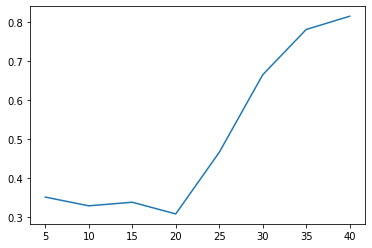

In [11]:
MLP_efficiency_curve(np.flip(sorted_indices.copy()), X_train)

## Tracer la courbe sans sélection de variables

Best 5 variables :
[30 28 29 26  1]
Score : 0.3964
Best 10 variables :
[30 28 29 26  1 39 37 33  9 23]
Score : 0.5128
Best 15 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4]
Score : 0.6924
Best 20 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4 13 10 36 18 21]
Score : 0.7412
Best 25 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4 13 10 36 18 21 38 11 14  5
  3]
Score : 0.7832
Best 30 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4 13 10 36 18 21 38 11 14  5
  3 16 31 34  6 32]
Score : 0.8192
Best 35 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4 13 10 36 18 21 38 11 14  5
  3 16 31 34  6 32 25 24  7 22 20]
Score : 0.8116
Best 40 variables :
[30 28 29 26  1 39 37 33  9 23 12 17 35  0  4 13 10 36 18 21 38 11 14  5
  3 16 31 34  6 32 25 24  7 22 20 15 27  2  8 19]
Score : 0.8364
[0.3964, 0.5128, 0.6924, 0.7412, 0.7832, 0.8192, 0.8116, 0.8364]


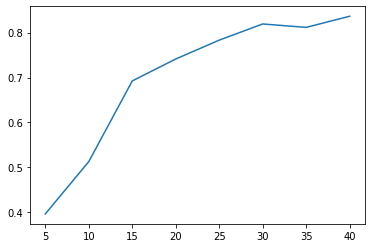

In [12]:
shuffle_indices = sorted_indices.copy()
np.random.shuffle(shuffle_indices)
MLP_efficiency_curve(shuffle_indices, X_train)

## En fixant le nombre de variables sélectionnées à 20, tracer la courbe de performance en fonction du % de données labélisées

10% of labelised variables :
Score All
Score : 0.8476
20% of labelised variables :
Score All
Score : 0.8564
30% of labelised variables :
Score All
Score : 0.8544
40% of labelised variables :
Score All
Score : 0.8616
50% of labelised variables :
Score All
Score : 0.8604
60% of labelised variables :
Score All
Score : 0.8672
70% of labelised variables :
Score All
Score : 0.8584
80% of labelised variables :
Score All
Score : 0.8536
90% of labelised variables :
Score All
Score : 0.8556
[0.8476, 0.8564, 0.8544, 0.8616, 0.8604, 0.8672, 0.8584, 0.8536, 0.8556]


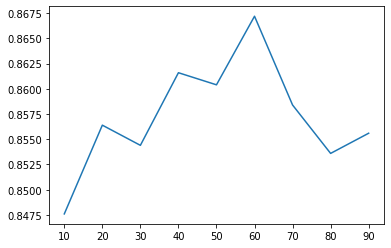

In [20]:
step = 10
current_step = step
scores = []

for i in range(9):
  
  print(f"{current_step}% of labelised variables :")

  semi_FS.update_labelised_rate(current_step/100)

  current_scores = semi_FS.score_all()
  current_sorted_scores = current_scores.copy()
  current_sorted_scores.sort(reverse=True)

  best_indices = np.array(current_scores).argsort()[::-1]
  best_indices = best_indices[:20]

  # Model Training
  X_best_train = semi_FS.X_train1.iloc[:, best_indices]
  model = MLPClassifier(alpha=0.01)
  model.fit(X_best_train, semi_FS.y_train1)
  predict = model.predict(semi_FS.X_test.iloc[:, best_indices])

  acc_score = accuracy_score(semi_FS.y_test, predict)
  

  print(f"Score : {acc_score}")

  current_step += step
  scores.append(acc_score)
  
print(scores)
plt.plot(range(step, (len(scores)+1) * step, step), scores)